In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
import re
import pandas as pd
import numpy as np
from string import punctuation
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
df1 = pd.read_csv('DataProject2/Data Historis ANTM.csv', delimiter=",", encoding="utf-8")
df2 = pd.read_csv('DataProject2/Data Historis BBNI.csv', delimiter=",", encoding="utf-8")
df3 = pd.read_csv('DataProject2/Data Historis ICBP.csv', delimiter=",", encoding="utf-8")
df4 = pd.read_csv('DataProject2/Data Historis TLKM.csv', delimiter=",", encoding="utf-8")
df5 = pd.read_csv('DataProject2/Data Historis WIKA.csv', delimiter=",", encoding="utf-8")

In [5]:
print('shape1:', df1.shape)
print(df1.isnull().sum())
print('shape2:', df2.shape)
print(df2.isnull().sum())
print('shape3:', df3.shape)
print(df3.isnull().sum())
print('shape4:', df4.shape)
print(df4.isnull().sum())
print('shape5:', df5.shape)
print(df5.isnull().sum())

shape1: (1456, 7)
Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64
shape2: (1456, 7)
Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64
shape3: (1456, 7)
Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64
shape4: (1456, 7)
Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64
shape5: (1456, 7)
Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64


# PREPORCESSING

In [0]:
df1 = df1.rename(columns={"Perubahan%": "Perubahan"})
df1 = df1.rename(columns={"Vol.": "Volume"})

df2 = df2.rename(columns={"Perubahan%": "Perubahan"})
df2 = df2.rename(columns={"Vol.": "Volume"})

df3 = df3.rename(columns={"Perubahan%": "Perubahan"})
df3 = df3.rename(columns={"Vol.": "Volume"})

df4 = df4.rename(columns={"Perubahan%": "Perubahan"})
df4 = df4.rename(columns={"Vol.": "Volume"})

df5 = df5.rename(columns={"Perubahan%": "Perubahan"})
df5 = df5.rename(columns={"Vol.": "Volume"})

In [0]:
for t in list(punctuation):
    df1['Perubahan'] = df1['Perubahan'].str.replace('[%]','')
    df1['Perubahan'] = df1['Perubahan'].str.replace('[,]','.')
    df1['Volume'] = df1['Volume'].str.replace('[,]','')
    df1['Volume'] = df1['Volume'].str.replace('[M]','000000')
    
    df2['Perubahan'] = df2['Perubahan'].str.replace('[%]','')
    df2['Perubahan'] = df2['Perubahan'].str.replace('[,]','.')
    df2['Volume'] = df2['Volume'].str.replace('[,]','')
    df2['Volume'] = df2['Volume'].str.replace('[M]','000000')
    
    df3['Perubahan'] = df3['Perubahan'].str.replace('[%]','')
    df3['Perubahan'] = df3['Perubahan'].str.replace('[,]','.')
    df3['Volume'] = df3['Volume'].str.replace('[,]','')
    df3['Volume'] = df3['Volume'].str.replace('[M]','000000')
    df3['Volume'] = df3['Volume'].str.replace('[K]','000')
    
    df4['Perubahan'] = df4['Perubahan'].str.replace('[%]','')
    df4['Perubahan'] = df4['Perubahan'].str.replace('[,]','.')
    df4['Volume'] = df4['Volume'].str.replace('[,]','')
    df4['Volume'] = df4['Volume'].str.replace('[M]','000000')
    
    df5['Perubahan'] = df5['Perubahan'].str.replace('[%]','')
    df5['Perubahan'] = df5['Perubahan'].str.replace('[,]','.')
    df5['Volume'] = df5['Volume'].str.replace('[,]','')
    df5['Volume'] = df5['Volume'].str.replace('[M]','000000')

In [0]:
df1['Perubahan'] = df1['Perubahan'].astype(float)
df1['Volume'] = df1['Volume'].astype(int)

df2['Perubahan'] = df2['Perubahan'].astype(float)
df2['Volume'] = df2['Volume'].astype(int)

df3['Perubahan'] = df3['Perubahan'].astype(float)
df3['Volume'] = df3['Volume'].astype(int)

df4['Perubahan'] = df4['Perubahan'].astype(float)
df4['Volume'] = df4['Volume'].astype(int)

df5['Perubahan'] = df5['Perubahan'].astype(float)
df5['Volume'] = df5['Volume'].astype(int)

In [9]:
df1.dtypes

Tanggal       object
Terakhir     float64
Pembukaan    float64
Tertinggi    float64
Terendah     float64
Volume         int64
Perubahan    float64
dtype: object

In [0]:
df1.loc[df1['Terakhir'] < 100, 'Terakhir'] = df1['Terakhir']*1000
df1.loc[df1['Pembukaan'] < 100, 'Pembukaan'] = df1['Pembukaan']*1000
df1.loc[df1['Tertinggi'] < 100, 'Tertinggi'] = df1['Tertinggi']*1000
df1.loc[df1['Terendah'] < 100, 'Terendah'] = df1['Terendah']*1000

df2.loc[df2['Terakhir'] < 100, 'Terakhir'] = df2['Terakhir']*1000
df2.loc[df2['Pembukaan'] < 100, 'Pembukaan'] = df2['Pembukaan']*1000
df2.loc[df2['Tertinggi'] < 100, 'Tertinggi'] = df2['Tertinggi']*1000
df2.loc[df2['Terendah'] < 100, 'Terendah'] = df2['Terendah']*1000

df3.loc[df3['Terakhir'] < 100, 'Terakhir'] = df3['Terakhir']*1000
df3.loc[df3['Pembukaan'] < 100, 'Pembukaan'] = df3['Pembukaan']*1000
df3.loc[df3['Tertinggi'] < 100, 'Tertinggi'] = df3['Tertinggi']*1000
df3.loc[df3['Terendah'] < 100, 'Terendah'] = df3['Terendah']*1000

df4.loc[df4['Terakhir'] < 100, 'Terakhir'] = df4['Terakhir']*1000
df4.loc[df4['Pembukaan'] < 100, 'Pembukaan'] = df4['Pembukaan']*1000
df4.loc[df4['Tertinggi'] < 100, 'Tertinggi'] = df4['Tertinggi']*1000
df4.loc[df4['Terendah'] < 100, 'Terendah'] = df4['Terendah']*1000

df5.loc[df5['Terakhir'] < 100, 'Terakhir'] = df5['Terakhir']*1000
df5.loc[df5['Pembukaan'] < 100, 'Pembukaan'] = df5['Pembukaan']*1000
df5.loc[df5['Tertinggi'] < 100, 'Tertinggi'] = df5['Tertinggi']*1000
df5.loc[df5['Terendah'] < 100, 'Terendah'] = df5['Terendah']*1000

In [0]:
#setting index as date
df1['Tanggal'] = pd.to_datetime(df1.Tanggal,format='%d/%m/%Y')
df1.index = df1['Tanggal']

df2['Tanggal'] = pd.to_datetime(df2.Tanggal,format='%d/%m/%Y')
df2.index = df2['Tanggal']

df3['Tanggal'] = pd.to_datetime(df3.Tanggal,format='%d/%m/%Y')
df3.index = df3['Tanggal']

df4['Tanggal'] = pd.to_datetime(df4.Tanggal,format='%d/%m/%Y')
df4.index = df4['Tanggal']

df5['Tanggal'] = pd.to_datetime(df5.Tanggal,format='%d/%m/%Y')
df5.index = df5['Tanggal']

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


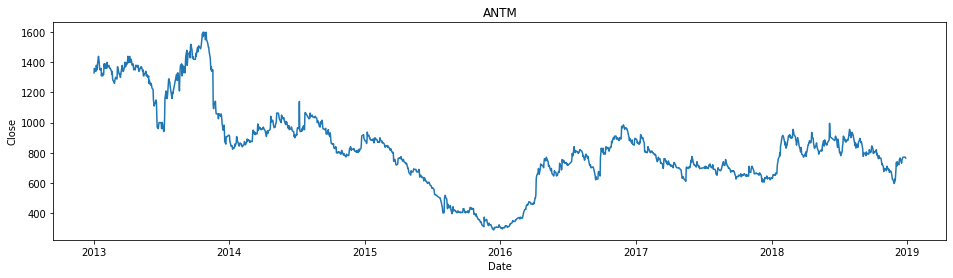

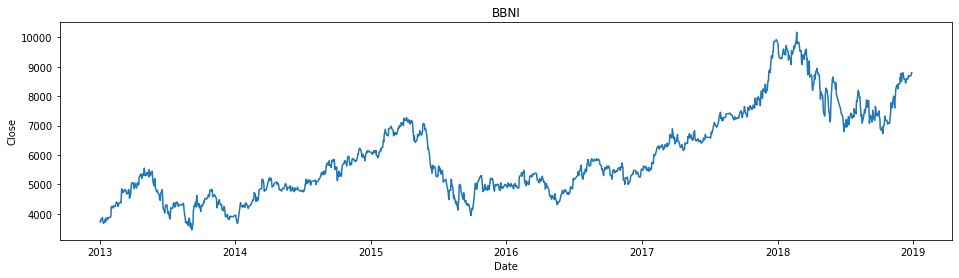

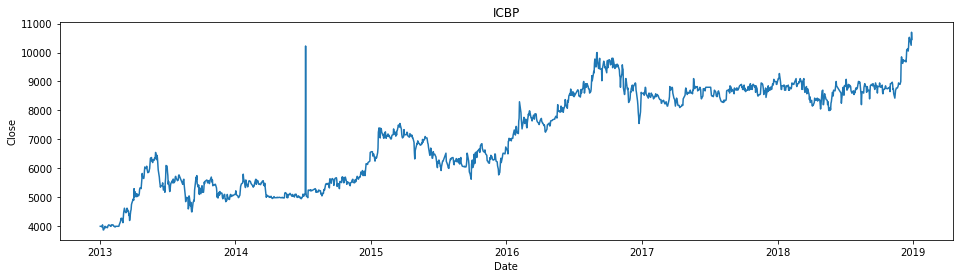

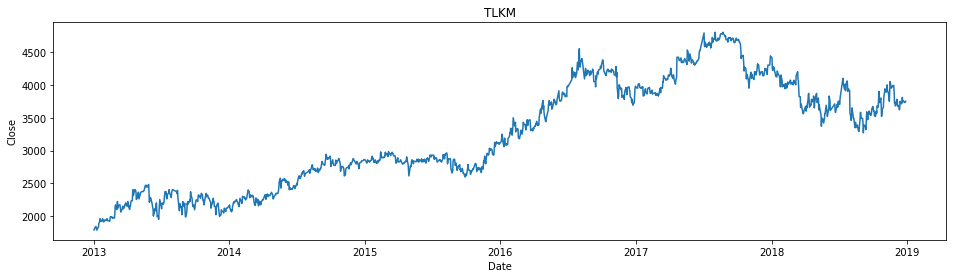

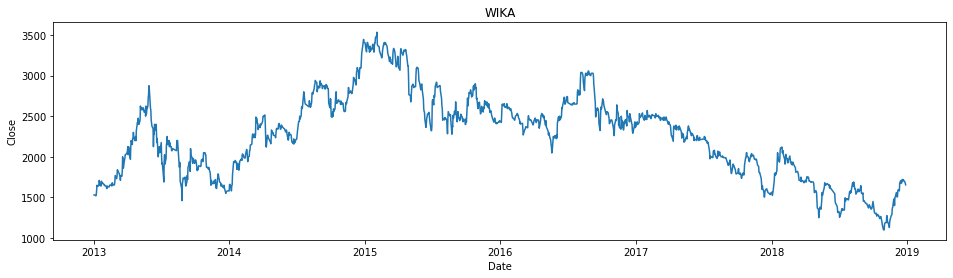

In [12]:
#plot ANTM
plt.figure(figsize=(16,4))
plt.title('ANTM')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df1['Terakhir'], label='Close Price history')

#plot BBNI
plt.figure(figsize=(16,4))
plt.title('BBNI')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df2['Terakhir'], label='Close Price history')

#plot ICBP
plt.figure(figsize=(16,4))
plt.title('ICBP')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df3['Terakhir'], label='Close Price history')

#plot TLKM
plt.figure(figsize=(16,4))
plt.title('TLKM')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df4['Terakhir'], label='Close Price history')

#plot WIKA
plt.figure(figsize=(16,4))
plt.title('WIKA')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df5['Terakhir'], label='Close Price history')

In [0]:
df1 = df1.drop(columns = ['Pembukaan','Tertinggi','Terendah','Volume','Perubahan'])
df2 = df2.drop(columns = ['Pembukaan','Tertinggi','Terendah','Volume','Perubahan'])
df3 = df3.drop(columns = ['Pembukaan','Tertinggi','Terendah','Volume','Perubahan'])
df4 = df4.drop(columns = ['Pembukaan','Tertinggi','Terendah','Volume','Perubahan'])
df5 = df5.drop(columns = ['Pembukaan','Tertinggi','Terendah','Volume','Perubahan'])

In [0]:
dataset1 = df1.drop(columns=['Tanggal'])
dataset2 = df2.drop(columns=['Tanggal'])
dataset3 = df3.drop(columns=['Tanggal'])
dataset4 = df4.drop(columns=['Tanggal'])
dataset5 = df5.drop(columns=['Tanggal'])

# LSTM (RNN)

In [0]:
#creating train and test sets

train1 = dataset1[:1164]
valid1 = dataset1[1164:]

train2 = dataset2[:1164]
valid2 = dataset2[1164:]

train3 = dataset3[:1164]
valid3 = dataset3[1164:]

train4 = dataset4[:1164]
valid4 = dataset4[1164:]

train5 = dataset5[:1164]
valid5 = dataset5[1164:]

In [0]:
#converting dataset into x_train and y_train

scaler1 = MinMaxScaler()
scaled_data1 = scaler1.fit_transform(dataset1)

scaler2 = MinMaxScaler()
scaled_data2 = scaler2.fit_transform(dataset2)

scaler3 = MinMaxScaler()
scaled_data3 = scaler3.fit_transform(dataset3)

scaler4 = MinMaxScaler()
scaled_data4 = scaler4.fit_transform(dataset4)

scaler5 = MinMaxScaler()
scaled_data5 = scaler5.fit_transform(dataset5)

In [0]:
# -----------------------------------------------------------------1
x_train1, y_train1 = [], []
for i in range(60,len(train1)):
    x_train1.append(scaled_data1[i-60:i,0])
    y_train1.append(scaled_data1[i,0])
x_train1, y_train1 = np.array(x_train1), np.array(y_train1)

x_train1 = np.reshape(x_train1, (x_train1.shape[0],x_train1.shape[1],1))

# -----------------------------------------------------------------2
x_train2, y_train2 = [], []
for i in range(60,len(train2)):
    x_train2.append(scaled_data2[i-60:i,0])
    y_train2.append(scaled_data2[i,0])
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)

x_train2 = np.reshape(x_train2, (x_train2.shape[0],x_train2.shape[1],1))

# -----------------------------------------------------------------3
x_train3, y_train3 = [], []
for i in range(60,len(train3)):
    x_train3.append(scaled_data3[i-60:i,0])
    y_train3.append(scaled_data3[i,0])
x_train3, y_train3 = np.array(x_train3), np.array(y_train3)

x_train3 = np.reshape(x_train3, (x_train3.shape[0],x_train3.shape[1],1))


# -----------------------------------------------------------------4
x_train4, y_train4 = [], []
for i in range(60,len(train4)):
    x_train4.append(scaled_data4[i-60:i,0])
    y_train4.append(scaled_data4[i,0])
x_train4, y_train4 = np.array(x_train4), np.array(y_train4)

x_train4 = np.reshape(x_train4, (x_train4.shape[0],x_train4.shape[1],1))

# -----------------------------------------------------------------5
x_train5, y_train5 = [], []
for i in range(60,len(train5)):
    x_train5.append(scaled_data5[i-60:i,0])
    y_train5.append(scaled_data5[i,0])
x_train5, y_train5 = np.array(x_train5), np.array(y_train5)

x_train5 = np.reshape(x_train5, (x_train5.shape[0],x_train5.shape[1],1))

In [18]:
# create and fit the LSTM network -1
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(x_train1.shape[1],1)))
model1.add(LSTM(units=50))
model1.add(Dense(1))

# create and fit the LSTM network -2
model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape=(x_train2.shape[1],1)))
model2.add(LSTM(units=50))
model2.add(Dense(1))

# create and fit the LSTM network -3
model3 = Sequential()
model3.add(LSTM(units=50, return_sequences=True, input_shape=(x_train3.shape[1],1)))
model3.add(LSTM(units=50))
model3.add(Dense(1))

# create and fit the LSTM network -4
model4 = Sequential()
model4.add(LSTM(units=50, return_sequences=True, input_shape=(x_train4.shape[1],1)))
model4.add(LSTM(units=50))
model4.add(Dense(1))

# create and fit the LSTM network -5
model5 = Sequential()
model5.add(LSTM(units=50, return_sequences=True, input_shape=(x_train5.shape[1],1)))
model5.add(LSTM(units=50))
model5.add(Dense(1))

In [19]:
# -----------------------------------------------------------------1
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(x_train1, y_train1, epochs=175, batch_size=32, verbose=2)
# -----------------------------------------------------------------2
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(x_train2, y_train2, epochs=175, batch_size=32, verbose=2)
# -----------------------------------------------------------------3
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(x_train3, y_train3, epochs=175, batch_size=32, verbose=2)
# -----------------------------------------------------------------4
model4.compile(loss='mean_squared_error', optimizer='adam')
model4.fit(x_train4, y_train4, epochs=175, batch_size=32, verbose=2)
# -----------------------------------------------------------------5
model5.compile(loss='mean_squared_error', optimizer='adam')
model5.fit(x_train5, y_train5, epochs=175, batch_size=32, verbose=2)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/175





 - 13s - loss: 0.0315
Epoch 2/175
 - 8s - loss: 0.0023
Epoch 3/175
 - 8s - loss: 0.0017
Epoch 4/175
 - 8s - loss: 0.0015
Epoch 5/175
 - 8s - loss: 0.0014
Epoch 6/175
 - 8s - loss: 0.0013
Epoch 7/175
 - 8s - loss: 0.0012
Epoch 8/175
 - 8s - loss: 0.0011
Epoch 9/175
 - 8s - loss: 9.7344e-04
Epoch 10/175
 - 8s - loss: 9.5529e-04
Epoch 11/175
 - 8s - loss: 9.2173e-04
Epoch 12/175
 - 8s - loss: 8.9432e-04
Epoch 13/175
 - 8s - loss: 8.9642e-04
Epoch 14/175
 - 8s - loss: 9.3666e-04
Epoch 15/175
 - 8s - loss: 8.9454e-04
Epoch 16/175
 - 8s - loss: 8.3976e-04
Epoch 17/175
 - 8s - loss: 9.7050e-04
Epoch 18/175
 - 8s - loss: 7.9641e-04
Epoch 19/175
 - 8s - loss: 7.6058e-04
Epoch 20/175
 - 8s - loss: 7.5086e-04
Epoch 21/175
 - 8s - loss: 7.8940e-04
Epoch 22/175
 - 8s - loss: 7.5781e-04
Epoch 23/175
 - 8s - loss: 7.5046e-04
Epoch 24/175
 - 8s - loss: 7.2101e-04
Epoch 25/175
 - 8s - loss

In [0]:
#predicting train data 1
inputs1 = df1[len(df1) - len(valid1) - 60:].Terakhir
inputs1 = inputs1.values.reshape(-1,1)
inputs1 = scaler1.transform(inputs1)

#predicting train data 2
inputs2 = df2[len(df2) - len(valid2) - 60:].Terakhir
inputs2 = inputs2.values.reshape(-1,1)
inputs2 = scaler2.transform(inputs2)


#predicting train data 3
inputs3 = df3[len(df3) - len(valid3) - 60:].Terakhir
inputs3 = inputs3.values.reshape(-1,1)
inputs3 = scaler3.transform(inputs3)


#predicting train data 4
inputs4 = df4[len(df4) - len(valid4) - 60:].Terakhir
inputs4 = inputs4.values.reshape(-1,1)
inputs4 = scaler4.transform(inputs4)

#predicting train data 5
inputs5 = df5[len(df5) - len(valid5) - 60:].Terakhir
inputs5 = inputs5.values.reshape(-1,1)
inputs5 = scaler5.transform(inputs5)

In [0]:
# ----------------------------------------------------------data 1
X_test1 = []
for i in range(60,inputs1.shape[0]):
    X_test1.append(inputs1[i-60:i,0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0],X_test1.shape[1],1))
closing_price1 = model1.predict(X_test1)
closing_price1 = scaler1.inverse_transform(closing_price1)

# ----------------------------------------------------------data 2
X_test2 = []
for i in range(60,inputs2.shape[0]):
    X_test2.append(inputs2[i-60:i,0])
X_test2 = np.array(X_test2)

X_test2 = np.reshape(X_test2, (X_test2.shape[0],X_test2.shape[1],1))
closing_price2 = model2.predict(X_test2)
closing_price2 = scaler2.inverse_transform(closing_price2)

# ----------------------------------------------------------data 3
X_test3 = []
for i in range(60,inputs3.shape[0]):
    X_test3.append(inputs3[i-60:i,0])
X_test3 = np.array(X_test3)

X_test3 = np.reshape(X_test3, (X_test3.shape[0],X_test3.shape[1],1))
closing_price3 = model3.predict(X_test3)
closing_price3 = scaler3.inverse_transform(closing_price3)

# ----------------------------------------------------------data 4
X_test4 = []
for i in range(60,inputs4.shape[0]):
    X_test4.append(inputs4[i-60:i,0])
X_test4 = np.array(X_test4)
X_test4 = np.reshape(X_test4, (X_test4.shape[0],X_test4.shape[1],1))
closing_price4 = model4.predict(X_test4)
closing_price4 = scaler4.inverse_transform(closing_price4)

# ----------------------------------------------------------data 5
X_test5 = []
for i in range(60,inputs5.shape[0]):
    X_test5.append(inputs5[i-60:i,0])
X_test5 = np.array(X_test5)
X_test5 = np.reshape(X_test5, (X_test5.shape[0],X_test5.shape[1],1))
closing_price5 = model5.predict(X_test5)
closing_price5 = scaler5.inverse_transform(closing_price5)

In [0]:
valid1_true=np.array(valid1['Terakhir'])
valid2_true=np.array(valid2['Terakhir'])
valid3_true=np.array(valid3['Terakhir'])
valid4_true=np.array(valid4['Terakhir'])
valid5_true=np.array(valid5['Terakhir'])


In [23]:
rms1=np.sqrt(np.mean(np.power((valid1-closing_price1),2)))
print(rms1)

rms2=np.sqrt(np.mean(np.power((valid2-closing_price2),2)))
print(rms2)

rms3=np.sqrt(np.mean(np.power((valid3-closing_price3),2)))
print(rms3)

rms4=np.sqrt(np.mean(np.power((valid4-closing_price4),2)))
print(rms4)

rms5=np.sqrt(np.mean(np.power((valid5-closing_price5),2)))
print(rms5)

Terakhir    26.398523
dtype: float64
Terakhir    227.762542
dtype: float64
Terakhir    147.726547
dtype: float64
Terakhir    73.950427
dtype: float64
Terakhir    46.886443
dtype: float64


In [24]:
rscore1 = r2_score(valid1, closing_price1)
print('Rscore1:', rscore1)

rscore2 = r2_score(valid2, closing_price2)
print('Rscore2:', rscore2)

rscore3 = r2_score(valid3, closing_price3)
print('Rscore3:', rscore3)

rscore4 = r2_score(valid4, closing_price4)
print('Rscore4:', rscore4)

rscore5 = r2_score(valid5, closing_price5)
print('Rscore5:', rscore5)

Rscore1: 0.927247700542961
Rscore2: 0.9329865379909149
Rscore3: 0.8659060229654583
Rscore4: 0.9245430549039443
Rscore5: 0.9642165734498602


In [25]:
mse1 = mean_squared_error(valid1_true, closing_price1)
print('mse1:', mse1)

mse2 = mean_squared_error(valid2_true, closing_price2)
print('mse2:', mse2)

mse3 = mean_squared_error(valid3_true, closing_price3)
print('mse3:', mse3)

mse4 = mean_squared_error(valid4_true, closing_price4)
print('mse4:', mse4)

mse5 = mean_squared_error(valid5_true, closing_price5)
print('mse5:', mse5)

mse1: 696.8820057772355
mse2: 51875.775325362825
mse3: 21823.132659205832
mse4: 5468.665633554124
mse5: 2198.33854128946


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

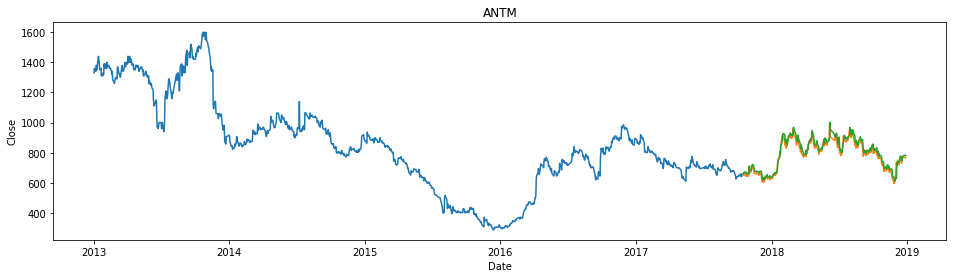

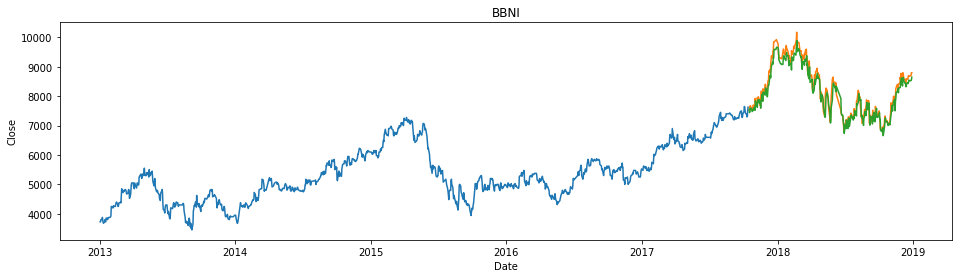

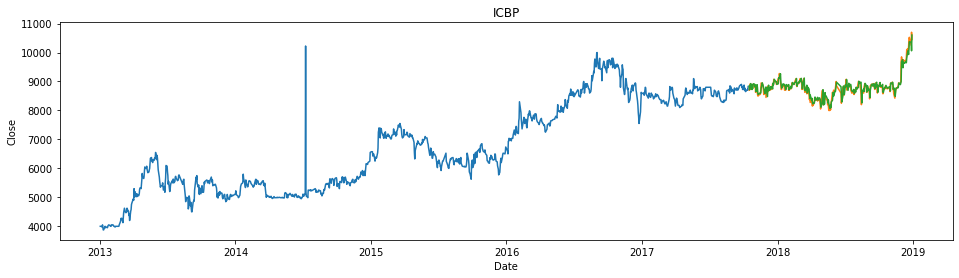

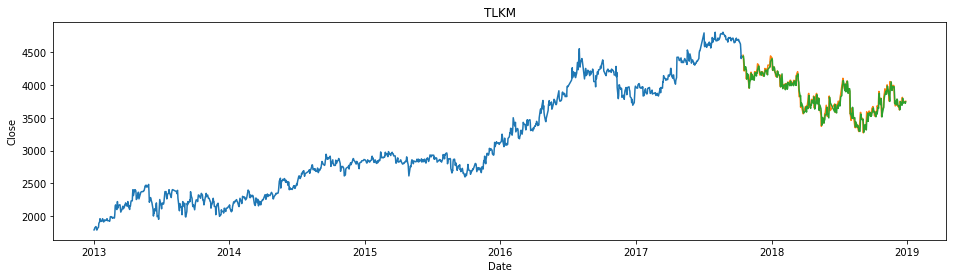

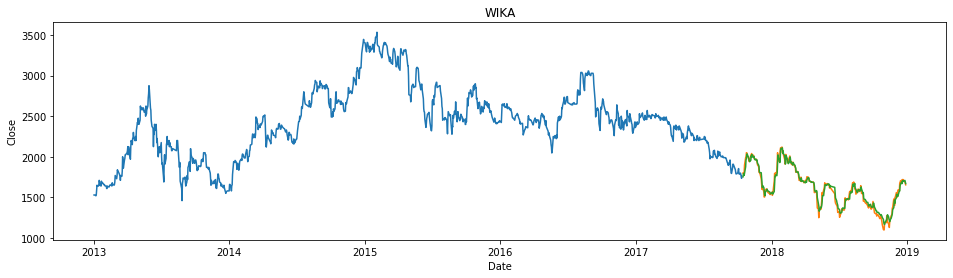

In [26]:
#for plotting-----------------------------------------1
valid1['Predictions'] = closing_price1
plt.figure(figsize=(16,4))
plt.plot(train1['Terakhir'])
plt.title('ANTM')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(valid1[['Terakhir','Predictions']])

#for plotting-----------------------------------------2
valid2['Predictions'] = closing_price2
plt.figure(figsize=(16,4))
plt.plot(train2['Terakhir'])
plt.title('BBNI')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(valid2[['Terakhir','Predictions']])

#for plotting-----------------------------------------3
valid3['Predictions'] = closing_price3
plt.figure(figsize=(16,4))
plt.plot(train3['Terakhir'])
plt.title('ICBP')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(valid3[['Terakhir','Predictions']])

#for plotting-----------------------------------------4
valid4['Predictions'] = closing_price4
plt.figure(figsize=(16,4))
plt.plot(train4['Terakhir'])
plt.title('TLKM')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(valid4[['Terakhir','Predictions']])

#for plotting-----------------------------------------5
valid5['Predictions'] = closing_price5
plt.figure(figsize=(16,4))
plt.plot(train5['Terakhir'])
plt.title('WIKA')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(valid5[['Terakhir','Predictions']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


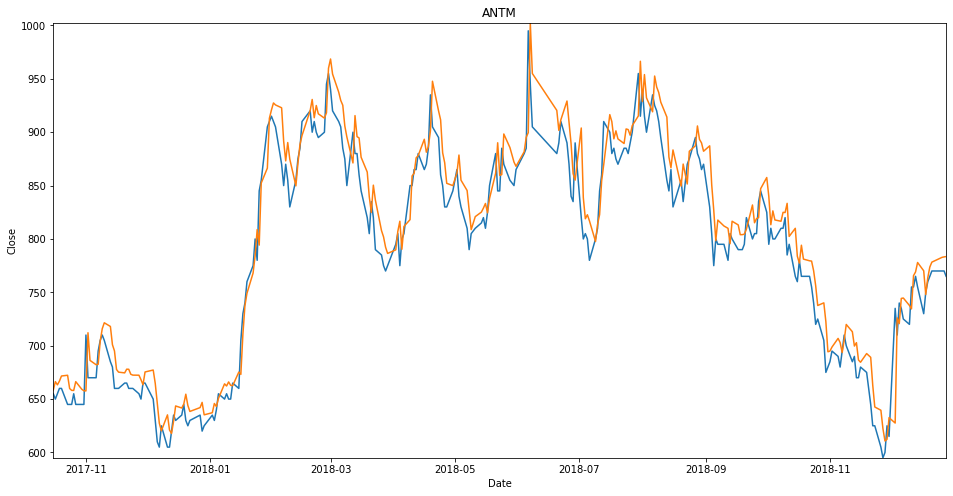

In [33]:
valid1['Predictions'] = closing_price1
plt.figure(figsize=(16,8))
plt.margins(x=0,y=0.00000000001)
plt.title('ANTM')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(valid1[['Terakhir','Predictions']])